In [79]:
""" Defining neccesary libraries """
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point,Polygon


In [80]:
""" Looking at the dataframe """
path = "./Dataset_CNI/BMTC.parquet.gzip"
path2 = "./Dataset_CNI/GroundTruth.csv"
path3 = "./Dataset_CNI/Input.csv"
df1 = pd.read_parquet(path,engine = 'pyarrow')
crs = {'init':'espg:4326'}
df2 = pd.read_csv(path2)
df3 = pd.read_csv(path3)

In [81]:
print(df1.head())

       BusID   Latitude  Longitude  Speed           Timestamp
0  150212121  13.074558  77.445549    0.0 2019-08-01 07:00:02
1  150212121  13.074558  77.445549    0.0 2019-08-01 07:00:12
2  150212121  13.074558  77.445549    0.0 2019-08-01 07:00:22
3  150212121  13.074558  77.445549    0.0 2019-08-01 07:00:32
4  150212121  13.074558  77.445549    0.0 2019-08-01 07:00:42


In [82]:
print(df2.head())

   Unnamed: 0         TT
0           0   2.833333
1           1   1.500000
2           2  21.250000
3           3   2.000000
4           4  35.733333


In [83]:
print(df3.head())

   Unnamed: 0  Source_Lat  Source_Long   Dest_Lat  Dest_Long
0           0   12.941644    77.557335  12.942002  77.551605
1           1   12.845487    77.662079  12.845881  77.667892
2           2   12.973492    77.622871  12.957303  77.621246
3           3   12.819298    77.688995  12.814241  77.692986
4           4   12.973240    77.615402  13.016170  77.627800


In [84]:
# Looking at the info 
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6014946 entries, 0 to 6014945
Data columns (total 5 columns):
 #   Column     Dtype         
---  ------     -----         
 0   BusID      int64         
 1   Latitude   float64       
 2   Longitude  float64       
 3   Speed      float64       
 4   Timestamp  datetime64[ns]
dtypes: datetime64[ns](1), float64(3), int64(1)
memory usage: 229.5 MB


In [85]:
df1.head()
#150212121

,BusID,Latitude,Longitude,Speed,Timestamp
0,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:02
1,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:12
2,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:22
3,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:32
4,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:42


In [86]:
index = 0 
for bus in df1["BusID"]:
    if(bus == 150212121):
        print("Bus is : " ,df1["BusID"][index])
        print("Bus speed is : ",df1["Speed"][index])
        print("Time stamp is : ",df1["Timestamp"][index])
        print("Latitute is : ",df1["Latitude"][index])
        print("Longitude is : ",df1["Longitude"][index])
    index+=1


Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:02
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:12
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:22
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:32
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:42
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:00:52
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:01:01
Latitute is :  13.074558
Longitude is :  77.445549
Bus is :  150212121
Bus speed is :  0.0
Time stamp is :  2019-08-01 07:01:11
Latitute is :  13.074558
Lo

In [87]:
path4 = "./bangalore/bangalore/GIS/bbmpwards/bbmpwards.shp"

In [88]:
street_map = gpd.read_file(path4)

In [89]:
import matplotlib.pyplot as plt

<AxesSubplot:>

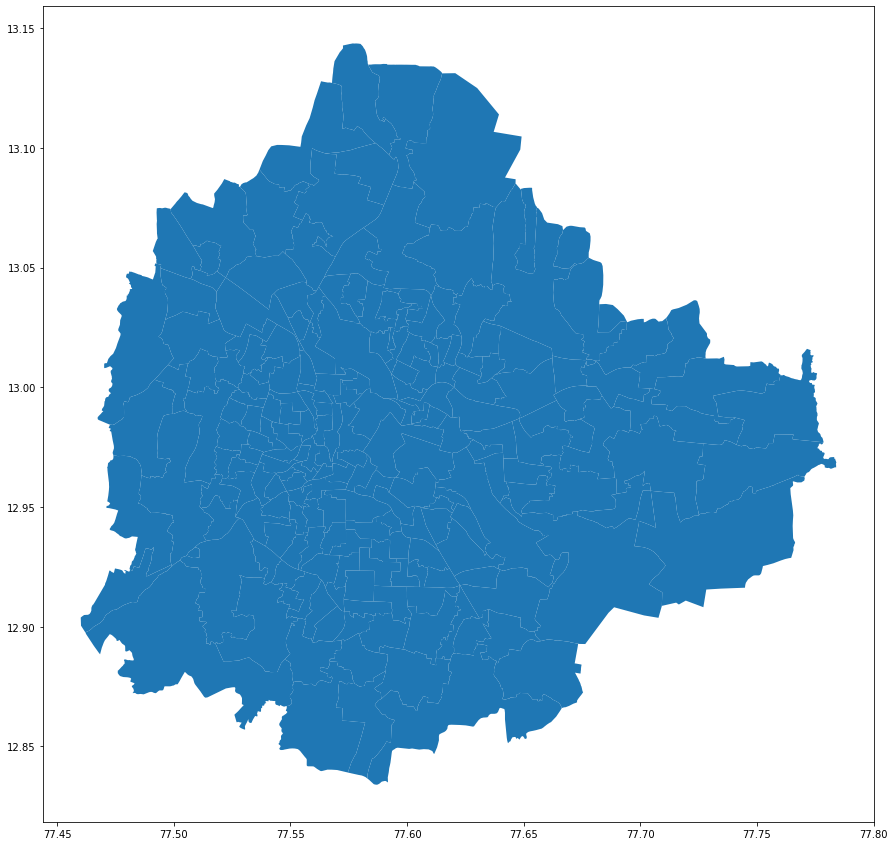

In [90]:
fig  , ax = plt.subplots(figsize = (15,15))
street_map.plot(ax = ax)

In [91]:
df1.head()

,BusID,Latitude,Longitude,Speed,Timestamp
0,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:02
1,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:12
2,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:22
3,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:32
4,150212121,13.074558,77.445549,0.0,2019-08-01 07:00:42


In [92]:
geometry = [ Point(xy) for xy in zip( df1["Longitude"] , df1["Latitude"])]

In [93]:
geometry[:3]

In [94]:
geo_df = gpd.GeoDataFrame(df1,crs = crs ,geometry=geometry)

c:\Users\aniru\anaconda3\lib\site-packages\pyproj\crs\crs.py:141: FutureWarning: '+init=<authority>:<code>' syntax is deprecated. '<authority>:<code>' is the preferred initialization method. When making the change, be mindful of axis order changes: https://pyproj4.github.io/pyproj/stable/gotchas.html#axis-order-changes-in-proj-6
  in_crs_string = _prepare_from_proj_string(in_crs_string)


CRSError: Invalid projection: +init=espg:4326 +type=crs: (Internal Proj Error: proj_create: cannot expand +init=espg:4326 +type=crs)